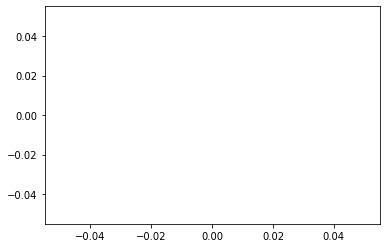

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import WageChangeExp, get_random_prob

In [2]:
prob = WageChangeExp()

<IPython.core.display.Latex object>

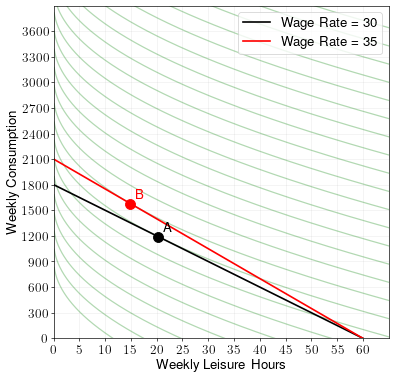

True

In [3]:
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, period1=True, period2=True)

In [4]:
examples = []
n_found = 0
for w1 in np.arange(15,80,5):
    for w2 in np.arange(15,80,5):
        for cmax in np.array([60])*max(w1,w2):
            for kd in np.arange(2,5):
                for kn in np.arange(1,kd):
                    for l1 in np.arange(10,55,5):
                        k = kn/kd
                        a = w1/(k*l1**(k-1))
                        params = {'a':a,'kn':kn,'kd':kd,'w1':w1,'w2':w2,'cmax':cmax}
                        prob = WageChangeExp(params)
                        if prob.check_solution() and (w1!=w2):
                            n_found+=1
                            examples.append( prob.params | prob.sol )
                            if (n_found%1000==0):
                                print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("WageChangeExp_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

973 examples found.


<IPython.core.display.Latex object>

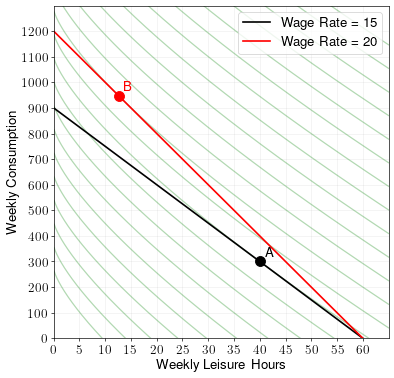

True

In [8]:
prob = get_random_prob(WageChangeExp, "WageChangeExp_examples.csv")
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, period1=True, period2=True)

In [11]:
w = 30
b = 1
a = 2400
a/(2*b*w) - 1/(2*b*w**2)

39.99944444444444